In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

__TODO: Rename gw DataFrame to gw2 or generic name__ 

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw9_lstm_test_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(426, 13)


,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,sum
0,mohamed_salah,6.791370,6.762707,6.672088,6.542232,6.520367,0,0,0,1,Liverpool,12.5,33.288764
1,raheem_sterling,6.260963,6.234212,6.148482,6.030325,6.007296,0,0,0,1,Manchester City,12.1,30.681279
2,kevin_de bruyne,5.945506,5.922667,5.840687,5.729690,5.707302,0,0,0,1,Manchester City,10.0,29.145851
3,sadio_mané,5.870006,5.832069,5.740691,5.627228,5.604617,0,0,0,1,Liverpool,11.7,28.674611
4,sergio_agüero,5.524582,5.476702,5.380150,5.270428,5.248706,0,1,0,0,Manchester City,12.2,26.900568


In [3]:
gw1_v1_player_predictions.rename(columns={'sum': 'predictions'}, inplace=True)

In [4]:
plot_df = pd.melt(gw1_v1_player_predictions[['name', 'GW_plus_1', 'GW_plus_2', 'GW_plus_3', 'GW_plus_4', 'GW_plus_5']], id_vars=['name'])
plot_df.rename(columns={'variable': 'GW', 'value': 'prediction'}, inplace=True)
plot_df.head()

,name,GW,prediction
0,mohamed_salah,GW_plus_1,6.791370
1,raheem_sterling,GW_plus_1,6.260963
2,kevin_de bruyne,GW_plus_1,5.945506
3,sadio_mané,GW_plus_1,5.870006
4,sergio_agüero,GW_plus_1,5.524582


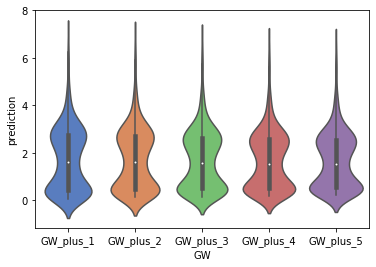

In [5]:
sns.violinplot(x="GW", y="prediction", data=plot_df, palette="muted", split=True)

In [6]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

__Need to do manual overwrite - looks like price just changed!__

In [7]:
# Keep Maddison in the team!
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'james_maddison', 'predictions'] = 100

In [8]:
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'patrick_van_aanholt', 'next_match_value'] = 5.5
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'joshua_king', 'next_match_value'] = 6.3
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'trent_alexander_arnold', 'next_match_value'] = 7.0
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'ashley_barnes', 'next_match_value'] = 6.6
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'james_maddison', 'next_match_value'] = 7.1

In [9]:
# Set predictions for known injured players to large negative number to force algorithm to subsitute them out of squad
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name']=='aymeric_laporte', 'predictions'] = -9999
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name']=='nathan_redmond', 'predictions'] = -9999

In [10]:
gw8_team_selection = pd.read_parquet('data/gw_team_selections/gw8_v2_2_team_selections.parquet')
gw8_team_selection['in_current_team'] = 1
gw8_team_selection

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,...,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,in_current_team
0,mohamed_salah,0,0,0,1,3.515319,12.5,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
1,callum_wilson,0,1,0,0,3.502761,7.9,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
2,trent_alexander_arnold,1,0,0,0,3.096027,7.2,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
3,abdoulaye_doucouré,0,0,0,1,2.323266,5.7,1.0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
4,joshua_king,0,1,0,0,2.254865,6.3,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
5,patrick_van_aanholt,1,0,0,0,2.180505,5.6,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
6,ashley_young,1,0,0,0,2.076955,5.4,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
7,tom_heaton,0,0,1,0,2.052484,4.5,1.0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
8,joel_matip,1,0,0,0,-9999.000000,5.5,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
9,hugo_lloris,0,0,1,0,1.928087,5.5,1.0,0,0,...,0,0,0,0,1,0,0,0,0.0,1


In [11]:
gw1_team = list(gw8_team_selection['name'])
gw1_team

['mohamed_salah',
 'callum_wilson',
 'trent_alexander_arnold',
 'abdoulaye_doucouré',
 'joshua_king',
 'patrick_van_aanholt',
 'ashley_young',
 'tom_heaton',
 'joel_matip',
 'hugo_lloris',
 'ashley_barnes',
 'james_maddison',
 'erik_lamela',
 'ricardo_domingos_barbosa_pereira',
 'david_silva']

In [12]:
len(gw1_team)

15

In [13]:
gw1_team_df = pd.DataFrame(
    {
        'name': gw1_team
    }
)
gw1_team_df['in_gw_1_team'] = 1

# Need to format here given that this was done at points prediction stage
gw1_team_df['name'] = gw1_team_df['name'].str.replace(' ', '_')
gw1_team_df['name'] = gw1_team_df['name'].str.replace('-', '_')

gw1_team_df

,name,in_gw_1_team
0,mohamed_salah,1
1,callum_wilson,1
2,trent_alexander_arnold,1
3,abdoulaye_doucouré,1
4,joshua_king,1
5,patrick_van_aanholt,1
6,ashley_young,1
7,tom_heaton,1
8,joel_matip,1
9,hugo_lloris,1


In [14]:
gw1_v1_player_predictions = gw1_v1_player_predictions.merge(gw1_team_df, on='name', how='left')
gw1_v1_player_predictions['in_gw_1_team'] = gw1_v1_player_predictions['in_gw_1_team'].fillna(0)
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team
0,mohamed_salah,6.791370,6.762707,6.672088,6.542232,6.520367,0,0,0,1,Liverpool,12.5,33.288764,1.0
1,raheem_sterling,6.260963,6.234212,6.148482,6.030325,6.007296,0,0,0,1,Manchester City,12.1,30.681279,0.0
2,kevin_de_bruyne,5.945506,5.922667,5.840687,5.729690,5.707302,0,0,0,1,Manchester City,10.0,29.145851,0.0
3,sadio_mané,5.870006,5.832069,5.740691,5.627228,5.604617,0,0,0,1,Liverpool,11.7,28.674611,0.0
4,sergio_agüero,5.524582,5.476702,5.380150,5.270428,5.248706,0,1,0,0,Manchester City,12.2,26.900568,0.0


In [15]:
#budget = gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()
#budget = budget + 0.1  # money in the bank
budget = 99
budget

99

## Pick team

In [16]:
from pulp import *

In [17]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [18]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,mohamed_salah,6.791370,6.762707,6.672088,6.542232,6.520367,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,raheem_sterling,6.260963,6.234212,6.148482,6.030325,6.007296,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,5.945506,5.922667,5.840687,5.729690,5.707302,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,sadio_mané,5.870006,5.832069,5.740691,5.627228,5.604617,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,sergio_agüero,5.524582,5.476702,5.380150,5.270428,5.248706,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
players = list(gw1_v1_player_predictions['name'])

In [20]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [21]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [22]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [23]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [24]:
GW1_team = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_gw_1_team']
    )
)

In [25]:
prob = LpProblem('FPL team selection', LpMaximize)

In [26]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [27]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [28]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= budget, "Total cost less than X"

prob += lpSum([costs[p] * player_vars[p] for p in players]) >= (budget - 0.2), "Total cost greater than X"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

#prob += lpSum(GW1_team[p] * player_vars[p] for p in players) >= 15, "at least X from original team i.e. max (15-X) transfers allowed"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [29]:
prob.solve()

1

In [30]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_bernd_leno = 1.0
player_jordan_ayew = 1.0
player_jorge_luiz_frello_filho = 1.0
player_joshua_king = 1.0
player_kevin_de_bruyne = 1.0
player_lewis_dunk = 1.0
player_lucas_digne = 1.0
player_mathew_ryan = 1.0
player_matteo_guendouzi = 1.0
player_mohamed_salah = 1.0
player_nathan_aké = 1.0
player_riyad_mahrez = 1.0
player_tammy_abraham = 1.0
player_trent_alexander_arnold = 1.0
player_virgil_van_dijk = 1.0


In [31]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,mohamed_salah,6.791370,6.762707,6.672088,6.542232,6.520367,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,5.945506,5.922667,5.840687,5.729690,5.707302,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6,trent_alexander_arnold,4.824502,4.774157,4.680015,4.584034,4.561719,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,riyad_mahrez,4.808848,4.764141,4.674308,4.580697,4.557334,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10,tammy_abraham,4.529581,4.470295,4.372285,4.280178,4.256964,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,virgil_van_dijk,4.341357,4.290328,4.198379,4.111756,4.089576,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,lucas_digne,3.838126,3.784743,3.693847,3.616431,3.594720,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,mathew_ryan,3.655350,3.595266,3.500935,3.425736,3.403104,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29,bernd_leno,3.584690,3.523701,3.428830,3.354261,3.332445,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,joshua_king,3.582316,3.518758,3.422140,3.347200,3.325018,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_selection.sum()

name                                 mohamed_salahkevin_de_bruynetrent_alexander_ar...
GW_plus_1                                                                      61.9227
GW_plus_2                                                                      61.1138
GW_plus_3                                                                      59.7211
GW_plus_4                                                                      58.4728
GW_plus_5                                                                      58.1407
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
next_match_value                                                                  98.9
predictions                                

## Starting 11

In [34]:
# 50% likelihood of playing
#test_selection.loc[test_selection['name'] == 'joel_matip', 'predictions'] = -9999

In [35]:
players = list(test_selection['name'])

In [36]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [37]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [38]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [39]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [40]:
prob = LpProblem('FPL team selection', LpMaximize)

In [41]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [42]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [43]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [44]:
prob.solve()

1

In [45]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_jordan_ayew = 1.0
player_jorge_luiz_frello_filho = 1.0
player_joshua_king = 1.0
player_kevin_de_bruyne = 1.0
player_lucas_digne = 1.0
player_mathew_ryan = 1.0
player_mohamed_salah = 1.0
player_riyad_mahrez = 1.0
player_tammy_abraham = 1.0
player_trent_alexander_arnold = 1.0
player_virgil_van_dijk = 1.0


In [46]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,mohamed_salah,6.791370,6.762707,6.672088,6.542232,6.520367,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,5.945506,5.922667,5.840687,5.729690,5.707302,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6,trent_alexander_arnold,4.824502,4.774157,4.680015,4.584034,4.561719,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,riyad_mahrez,4.808848,4.764141,4.674308,4.580697,4.557334,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10,tammy_abraham,4.529581,4.470295,4.372285,4.280178,4.256964,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,virgil_van_dijk,4.341357,4.290328,4.198379,4.111756,4.089576,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,lucas_digne,3.838126,3.784743,3.693847,3.616431,3.594720,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,mathew_ryan,3.655350,3.595266,3.500935,3.425736,3.403104,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,joshua_king,3.582316,3.518758,3.422140,3.347200,3.325018,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39,jorge_luiz_frello_filho,3.316193,3.253215,3.158449,3.088822,3.066962,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_selection_11[test_selection_11['name'] != 'mohamed_salah']['GW_plus_1'].sum() + test_selection_11[test_selection_11['name'] == 'mohamed_salah']['GW_plus_1'].sum() * 2

55.72763705253601

In [49]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,mohamed_salah,1
1,kevin_de_bruyne,1
2,trent_alexander_arnold,1
3,riyad_mahrez,1
4,tammy_abraham,1
5,virgil_van_dijk,1
6,lucas_digne,1
7,mathew_ryan,1
8,joshua_king,1
9,jorge_luiz_frello_filho,1


In [50]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,mohamed_salah,6.791370,6.762707,6.672088,6.542232,6.520367,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,kevin_de_bruyne,5.945506,5.922667,5.840687,5.729690,5.707302,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,trent_alexander_arnold,4.824502,4.774157,4.680015,4.584034,4.561719,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,riyad_mahrez,4.808848,4.764141,4.674308,4.580697,4.557334,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
4,tammy_abraham,4.529581,4.470295,4.372285,4.280178,4.256964,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,virgil_van_dijk,4.341357,4.290328,4.198379,4.111756,4.089576,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
6,lucas_digne,3.838126,3.784743,3.693847,3.616431,3.594720,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
7,mathew_ryan,3.655350,3.595266,3.500935,3.425736,3.403104,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
8,bernd_leno,3.584690,3.523701,3.428830,3.354261,3.332445,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
9,joshua_king,3.582316,3.518758,3.422140,3.347200,3.325018,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [51]:
gw_selection_df[['name', 'predictions']]

,name,predictions
0,mohamed_salah,33.288764
1,kevin_de_bruyne,29.145851
2,trent_alexander_arnold,23.424427
3,riyad_mahrez,23.385327
4,tammy_abraham,21.909304
5,virgil_van_dijk,21.031396
6,lucas_digne,18.527868
7,mathew_ryan,17.580391
8,bernd_leno,17.223928
9,joshua_king,17.195432


In [52]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw9_lstm_test_team_selections.parquet', index=False)